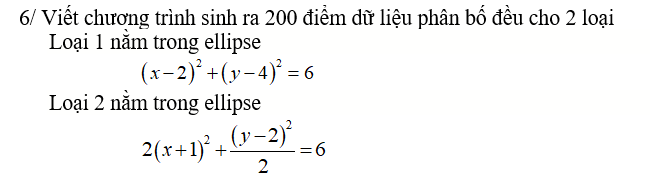

a/ Tách ngẫu nhiên 80% dữ liệu để train và 20% dữ liệu để test. 


b/ Thực hiện huấn luyện bộ dữ liệu bằng mạng ANN, có 2 lớp ẩn, số nút tùy chọn.


c/ Thực hiện huấn luyện câu b/ 3 lần, vẽ ra 3 đường ROC. Chọn từ 3 mạng ANN huấn luyện được một mạng ANN có AUC lớn nhất.


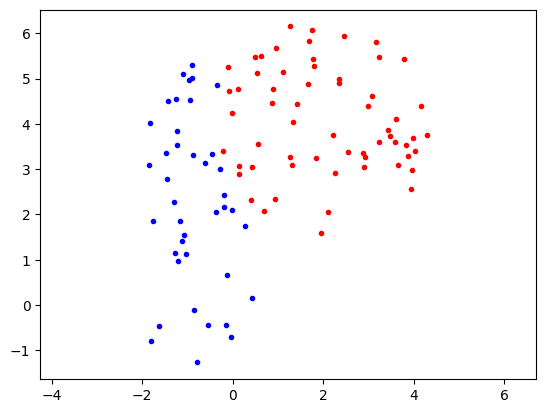

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#TẠO RA 200 ĐIỂM DỮ LIỆU TRONG KHÔNG GIAN 2D

plt.figure()
plt.axis('equal')

X =[]
t = []

i = 0
while i < 100 :
    x = np.random.random(1)*10-2
    y = np.random.random(1)*10-2

    #Loại 1
    if (x-2)**2 + (y-4)**2 < 6: 
        t.append(0)
        i+=1
        plt.plot(x,y, 'r.')

    #Loại 2
    elif 2*(x+1)**2 + 1/2*(y-2)**2 <6:
        t.append(1)
        i+=1
        plt.plot(x,y, 'b.')

    else: continue
    X.append([x,y])



In [11]:
X = np.array(X).reshape(-1, 2).astype(np.float32)
t = np.array(t).astype(np.float32)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, t, test_size=0.2, random_state= 42)

In [21]:
from sklearn.neural_network import MLPRegressor
ann1 = MLPRegressor(activation='relu', learning_rate = 'adaptive', alpha=1e-5, hidden_layer_sizes= tuple(20 for _ in range(2)))
ann1.fit(X_train, Y_train)    
ann2 = MLPRegressor(activation='logistic', learning_rate = 'adaptive', alpha=1e-5, hidden_layer_sizes= tuple(30 for _ in range(2)))
ann2.fit(X_train, Y_train)  
ann3 = MLPRegressor(activation='tanh', learning_rate = 'adaptive', alpha=1e-5, hidden_layer_sizes= (40,40))
ann3.fit(X_train, Y_train)     

MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=(40, 40),
             learning_rate='adaptive')

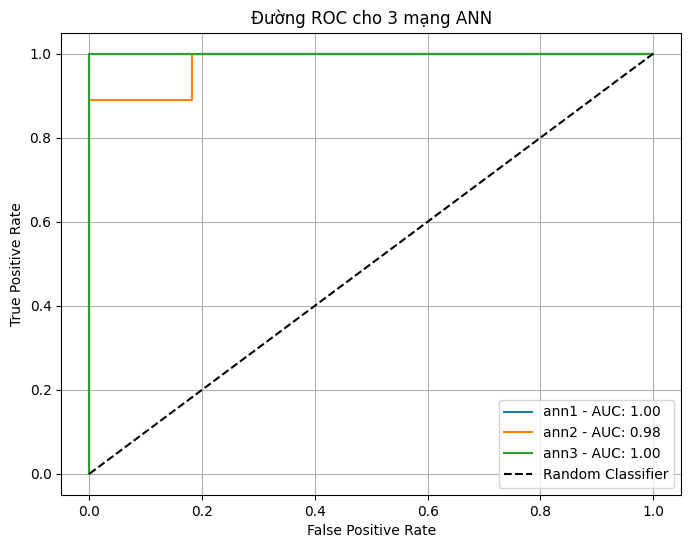

In [23]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(8,6))

models=[ann1, ann2, ann3]
model_names = ['ann1', 'ann2', 'ann3']
for model, model_name in zip(models, model_names):
    probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(Y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} - AUC: {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường ROC cho 3 mạng ANN')
plt.legend()
plt.grid(True)
plt.show()
